# DQN　仕様変更確認


<div class="notebook-data">
<div class="author">Ogawa</div>
<div class="company">GRID</div>
<div class="date">2019/1/25</div>
<div class="description">
</div>
</div>

## Conclusion

DQN logger successful.

## Environment


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import renom as rm
from renom_rl.discrete.dqn import DQN
from old.dqn import DQN as DQN_old
from renom_rl.environ.env import BaseEnv
from renom_rl.utility import Animation

env = gym.make('CartPole-v0')
env2 = gym.make('CartPole-v0')


class CustomEnv(BaseEnv):
    
    def __init__(self, env):
        #required variables
        self.action_shape = (2,)
        self.state_shape = (4,)
        
        #custom variables
        self.env=env
        self.step_continue=0
        self.animation=Animation()
        

    # required function
    def reset(self):
        self.step_continue=0
        return self.env.reset()
        
    
    def sample(self):
        rand=self.env.action_space.sample()
        return rand
    
    def step(self, action):
        state,_,terminal,_=self.env.step(int(action))

        self.step_continue+=1
        reward=0
        
        if terminal:
            if self.step_continue >= 200:
                reward=1
            else:
                reward=-1
#             reward = self.step_continue/100
        
        return state, reward, terminal

    # test function
    def test_start(self):
#         self.animation.reset()
        pass

    def test_epoch_step(self):
#         self.animation.store(self.env.render(mode="rgb_array"))
        pass

    def test_close(self):
#         self.env.close()
         pass

    # custom functions
    def play(self):
        self.animation.run()
    
            
custom_env = CustomEnv(env)
custom_env2 = CustomEnv(env2)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/mikeogawa/gym/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/mikeogawa/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


## Agent

In [2]:
q_network = rm.Sequential([rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(custom_env2.action_shape[0], ignore_bias=True)])


q_network2 = rm.Sequential([rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(30, ignore_bias=True),
                           rm.Relu(),
                           rm.Dense(custom_env2.action_shape[0], ignore_bias=True)])


After the 2 instance are prepared, we input them in the ReNomRL model.

In [3]:
model = DQN_old(custom_env, q_network)
model2 = DQN(custom_env2, q_network2)

In [4]:
from renom_rl.utility.logger import DQNLogger
new_logger=DQNLogger(["steps_per_episode"])
model2.logger = new_logger

## Action Filter

In [5]:
from renom_rl.utility.filter import EpsilonEIFilter
fil = EpsilonEIFilter(min=0,max=0.5,alpha=0.1)

## Executing Training

In [6]:
## New DQN
model2.fit( epoch=2,
            epoch_step=5000,
            random_step=32,
            batch_size=32,
            train_frequency=2,
            update_period=2,
            action_filter=fil,
                  )

epoch 0001 epsilon 0.5000 loss 0.0221 rewards in epoch -2.000 episode 0002 rewards in episode -1.000.:   1%|          | 30/5000 [00:00<00:31, 159.87it/s]

Run random 32 step for storing experiences


epoch 001 avg_loss:0.0070 total reward in epoch: [train:-50.000 test:-1.0] avg train reward in episode:-0.847 epsilon :0.147: 100%|██████████| 5000/5000 [00:35<00:00, 141.97it/s]
epoch 002 avg_loss:0.0039 total reward in epoch: [train:-16.000 test:-1.0] avg train reward in episode:-0.457 epsilon :0.098: 100%|██████████| 5000/5000 [00:35<00:00, 142.15it/s]


In [7]:
model.fit( epoch=1,
                    epoch_step=5000,
                    random_step=32,
                    batch_size=32,
                    train_frequency=2,
                    update_period=2,
                    action_filter=fil,
                  )

epoch 0001 epsilon 0.5000 loss 0.0170 rewards in epoch -1.000 episode 0001 rewards in episode -1.000.:   1%|          | 33/5000 [00:00<00:27, 181.39it/s]

Run random 32 step for storing experiences


epoch 001 avg_loss:0.0059 total reward in epoch: [train:-94.000 test:-1.0] avg train reward in episode:-0.887 epsilon :0.086: 100%|██████████| 5000/5000 [00:32<00:00, 153.96it/s]


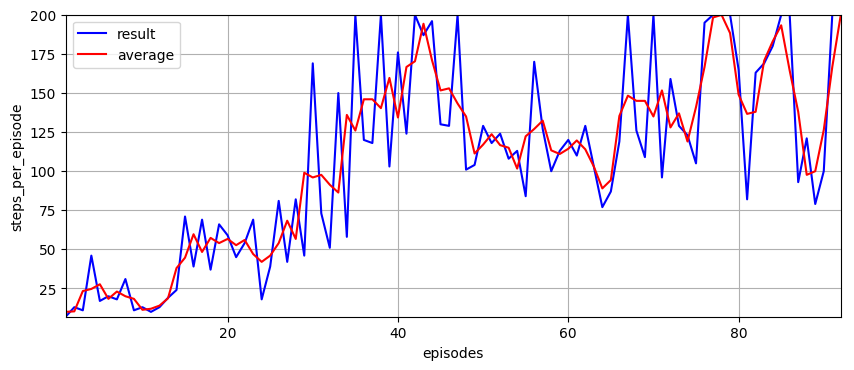

In [8]:
# model2.logger._log_dic
model2.logger.graph("steps_per_episode",average_range=1,figsize=(10,4))

In [9]:
# ## New DQN
# model2.fit( epoch=10,
#             epoch_step=1000,
#             random_step=32,
#             batch_size=32,
#             train_frequency=2,
#             update_period=2,
#             action_filter=fil,
#                   )

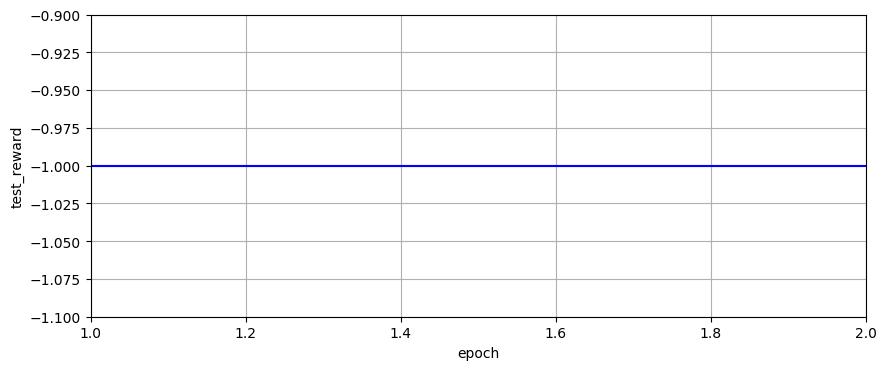

In [10]:
model2.logger.graph_epoch("test_reward",figsize=(10,4))

In [11]:
model2.logger.result_epoch()

{'test_reward': [-1.0, -1.0]}